<a href="https://colab.research.google.com/github/MurtazaMister/ML/blob/master/ML_Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble learning

## Stacking 

In [140]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import accuracy_score

In [141]:
data = load_breast_cancer()
data.target_names, data.feature_names

(array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [142]:
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit_transform(data.data)
y = data.target

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.85
)

In [144]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, train_size=0.75)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, train_size=0.75)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_train, y_train, train_size=0.75)

### First model - Decision tree classifier

In [145]:
from sklearn import tree
from sklearn import metrics

model_1 = tree.DecisionTreeClassifier(max_depth=1)
model_1 = model_1.fit(X_train_1, y_train_1)

y_pred_1 = model_1.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))
print("Precision:",metrics.precision_score(y_test_1,y_pred_1))
print("Recall:",metrics.recall_score(y_test_1,y_pred_1))
print("F1 score:",metrics.f1_score(y_test_1,y_pred_1))

Accuracy: 0.9338842975206612
Precision: 0.9594594594594594
Recall: 0.9342105263157895
F1 score: 0.9466666666666667


### Second model - Gaussian Naive Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model_2 = GaussianNB().fit(X_train_2, y_train_2)

y_pred_2 = model_2.predict(X_test_2)

print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))
print("Precision:",metrics.precision_score(y_test_2,y_pred_2))
print("Recall:",metrics.recall_score(y_test_2,y_pred_2))
print("F1 score:",metrics.f1_score(y_test_2,y_pred_2))

Accuracy: 0.9504132231404959
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 score: 0.9577464788732394


### Third model - Multinomial Naive Bayes

In [147]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model_3 = MultinomialNB().fit(X_train_3, y_train_3)

y_pred_3 = model_3.predict(X_test_3)

print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))
print("Precision:",metrics.precision_score(y_test_3,y_pred_3))
print("Recall:",metrics.recall_score(y_test_3,y_pred_3))
print("F1 score:",metrics.f1_score(y_test_3,y_pred_3))

Accuracy: 0.8181818181818182
Precision: 0.7843137254901961
Recall: 1.0
F1 score: 0.8791208791208792


### The final model

In [148]:
from sklearn.linear_model import LogisticRegression

X_train_final = []
y_train_final = []

y_train_final_1 = model_1.predict(X_train)
y_train_final_2 = model_2.predict(X_train)
y_train_final_3 = model_3.predict(X_train)

for i in range(len(y_train_final_1)):
  X_train_final.append([y_train_final_1[i], y_train_final_2[i], y_train_final_3[i]])
  y_train_final.append(y_train[i])

# Training the final model on the outputs of other models
model_final = LogisticRegression().fit(X_train_final, y_train_final)

In [149]:
from sklearn import metrics

X_test_final = []
y_test_final = []

y_test_final_1 = model_1.predict(X_test)
y_test_final_2 = model_2.predict(X_test)
y_test_final_3 = model_3.predict(X_test)

for i in range(len(y_test_final_1)):
  X_test_final.append([y_test_final_1[i], y_test_final_2[i], y_test_final_3[i]])
  y_test_final.append(y_test[i])

y_pred_final = model_final.predict(X_test_final)

print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred_final))
print("Precision:",metrics.precision_score(y_test_final,y_pred_final))
print("Recall:",metrics.recall_score(y_test_final,y_pred_final))
print("F1 score:",metrics.f1_score(y_test_final,y_pred_final))

Accuracy: 0.9302325581395349
Precision: 0.9298245614035088
Recall: 0.9636363636363636
F1 score: 0.9464285714285715


### Stacking using sklearn library - Breast Cancer dataset

In [154]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('gnb', GaussianNB()),
    ('dt', tree.DecisionTreeClassifier(max_depth=1)),
    ('mnb', MultinomialNB())
]

model_stacked = StackingClassifier(estimators=estimators).fit(X_train, y_train)

y_pred_stacked = model_stacked.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacked))
print("Precision:",metrics.precision_score(y_test,y_pred_stacked))
print("Recall:",metrics.recall_score(y_test,y_pred_stacked))
print("F1 score:",metrics.f1_score(y_test,y_pred_stacked))

Accuracy: 0.9186046511627907
Precision: 0.9285714285714286
Recall: 0.9454545454545454
F1 score: 0.9369369369369368


## Bagging

### Using BaggingClassifier

In [157]:
from sklearn.ensemble import BaggingClassifier

model_bagged = BaggingClassifier(max_features = 0.67).fit(X_train, y_train)

y_pred_bagged = model_bagged.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bagged))
print("Precision:",metrics.precision_score(y_test,y_pred_bagged))
print("Recall:",metrics.recall_score(y_test,y_pred_bagged))
print("F1 score:",metrics.f1_score(y_test,y_pred_bagged))

Accuracy: 0.9302325581395349
Precision: 0.9803921568627451
Recall: 0.9090909090909091
F1 score: 0.9433962264150944


### Using RandomForestClassifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

y_pred_random_forest = model_random_forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random_forest))
print("Precision:",metrics.precision_score(y_test,y_pred_random_forest))
print("Recall:",metrics.recall_score(y_test,y_pred_random_forest))
print("F1 score:",metrics.f1_score(y_test,y_pred_random_forest))

Accuracy: 0.9534883720930233
Precision: 0.9811320754716981
Recall: 0.9454545454545454
F1 score: 0.9629629629629629


## Adaboost Classifier

In [164]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1).fit(X_train, y_train)

y_pred_adaboost = model_adaboost.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adaboost))
print("Precision:",metrics.precision_score(y_test,y_pred_adaboost))
print("Recall:",metrics.recall_score(y_test,y_pred_adaboost))
print("F1 score:",metrics.f1_score(y_test,y_pred_adaboost))

Accuracy: 0.9534883720930233
Precision: 0.9473684210526315
Recall: 0.9818181818181818
F1 score: 0.9642857142857142


# Exercise

Try Adaboost Regression on concrete_data.csv

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
from sklearn import preprocessing

data = pd.read_csv('/content/drive/MyDrive/concrete.csv')

df = pd.DataFrame(data)

X = preprocessing.MinMaxScaler().fit_transform(df.iloc[:, :8].values)
y = df['strength'].values

X, y

(array([[0.08972603, 0.58987201, 0.        , ..., 0.49651163, 0.38760662,
         0.07417582],
        [0.15273973, 0.11741792, 0.62118941, ..., 0.81337209, 0.50727546,
         0.03571429],
        [0.33789954, 0.        , 0.47826087, ..., 0.45319767, 0.67034621,
         0.07417582],
        ...,
        [0.39817352, 0.32276016, 0.45127436, ..., 0.20087209, 0.43728048,
         0.07417582],
        [0.54794521, 0.10573178, 0.        , ..., 0.38081395, 0.19066734,
         0.73901099],
        [1.        , 0.        , 0.        , ..., 0.94186047, 0.04766683,
         0.01648352]]), array([29.89, 23.51, 29.22, ..., 44.28, 55.06, 52.61]))

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

loss = 100
count = 0

model_adaboost_regressor = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='square').fit(X_train, y_train)
y_pred = model_adaboost_regressor.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
print(f"{count}/10 - Error: ", loss)
count = count+1

while loss>10 and count<=10:
  model_adaboost_regressor = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='square').fit(X_train, y_train)
  y_pred = model_adaboost_regressor.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  print(f"{count}/10 - Error: ", loss)
  count = count+1

0/10 - Error:  48.24678230043982
1/10 - Error:  45.410719169717446
2/10 - Error:  47.558321491493814
3/10 - Error:  49.44500902621898
4/10 - Error:  49.22906649043988
5/10 - Error:  47.44252592472971
6/10 - Error:  46.76464113063069
7/10 - Error:  48.207943099886315
8/10 - Error:  47.366426886404916
9/10 - Error:  47.72732428657582
10/10 - Error:  46.97726238177166


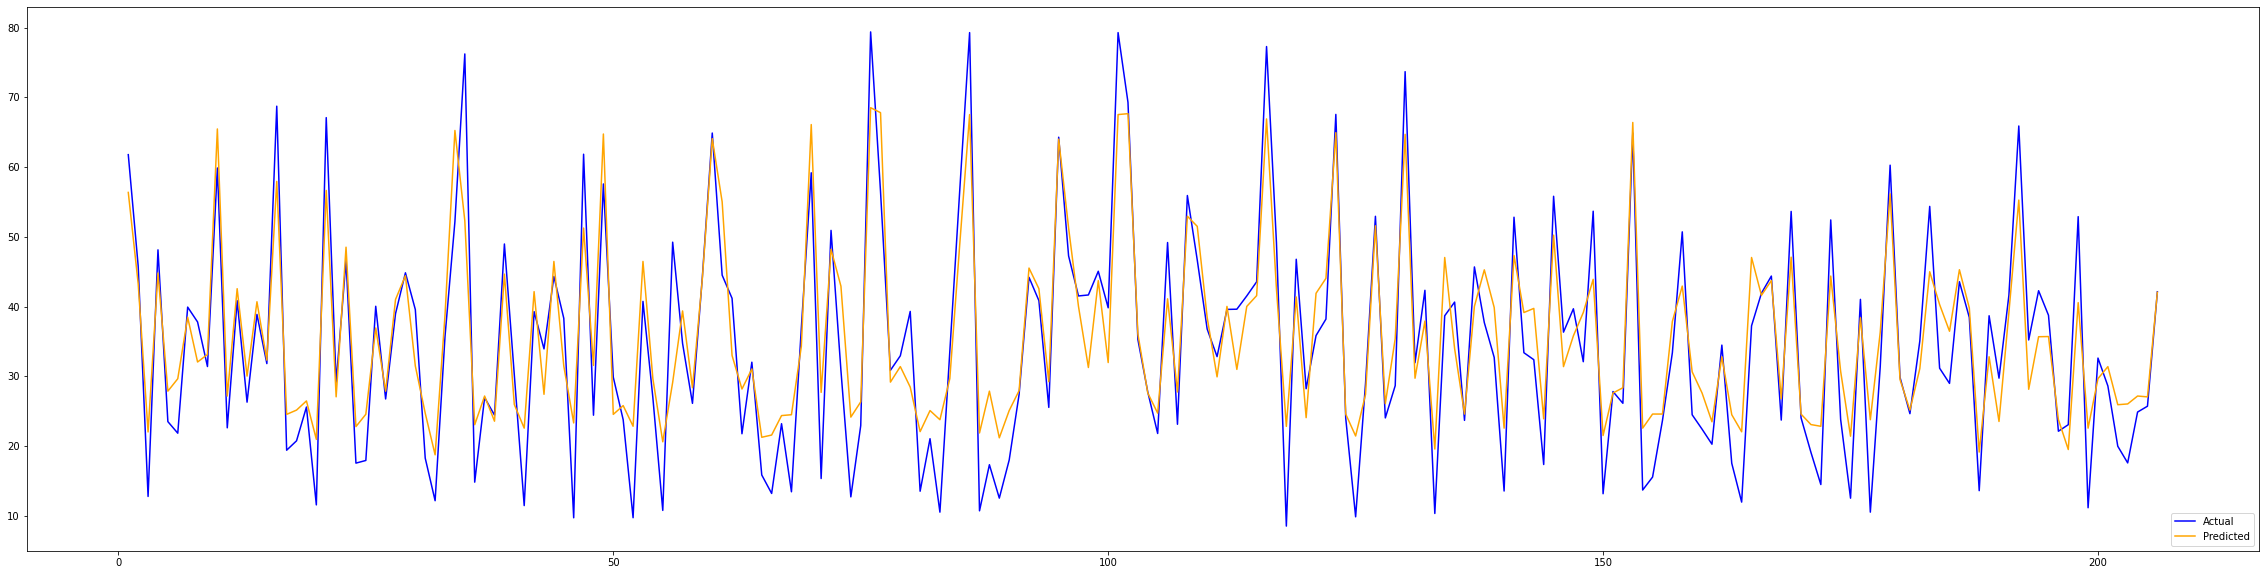

In [267]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40,10))
plt.plot(np.arange(1,len(y_test)+1), y_test, label='Actual', color='blue')
plt.plot(np.arange(1,len(y_pred)+1), y_pred, label='Predicted', color='orange')

plt.legend(["Actual", "Predicted"], loc ="lower right")